In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import sklearn.preprocessing as preprocessing
import sklearn.linear_model as linear_model
import sklearn.metrics as metrics

# Step 1: load the data 


Here is the set of variables contained in the data.

<li> age – The age of the individual </li>
<li> type_employer – The type of employer the individual has. Whether they are government, military, private, an d so on. </li>

<li> 
fnlwgt – The \# of people the census takers believe that observation represents. We will be ignoring this variable </li>
<li>  education – The highest level of education achieved for that individual </li>
<li> education_num – Highest level of education in numerical form </li>
<li> marital – Marital status of the individual </li> 
<li> occupation – The occupation of the individual </li>
<li> relationship – A bit more difficult to explain. Contains family relationship values like husband, father, and so on, but only contains one per observation. I’m not sure what this is supposed to represent </li>
<li> race – descriptions of the individuals race. Black, White, Eskimo, and so on </li>
<li> sex – Biological Sex </li>
<li> capital_gain – Capital gains recorded </li> 
<li> capital_loss – Capital losses recorded </li>
<li> hr_per_week – Hours worked per week </li>
<li> country – Country of origin for person </li>
<li> income – Boolean Variable. Whether or not the person makes more than $50,000 per annum income. </li>

In [152]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data',
                header = None)

In [153]:
df.columns = ['age','workclass','fnlwgt','education','education_num',
             'marital-status','occupation','relationship','race','sex','capital_gain',
              'capital_loss','hours_per_week','native_country','income']
print(df.shape)
df.head()

(32561, 15)


,age,workclass,fnlwgt,education,education_num,marital-status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


# Step 2: visualize


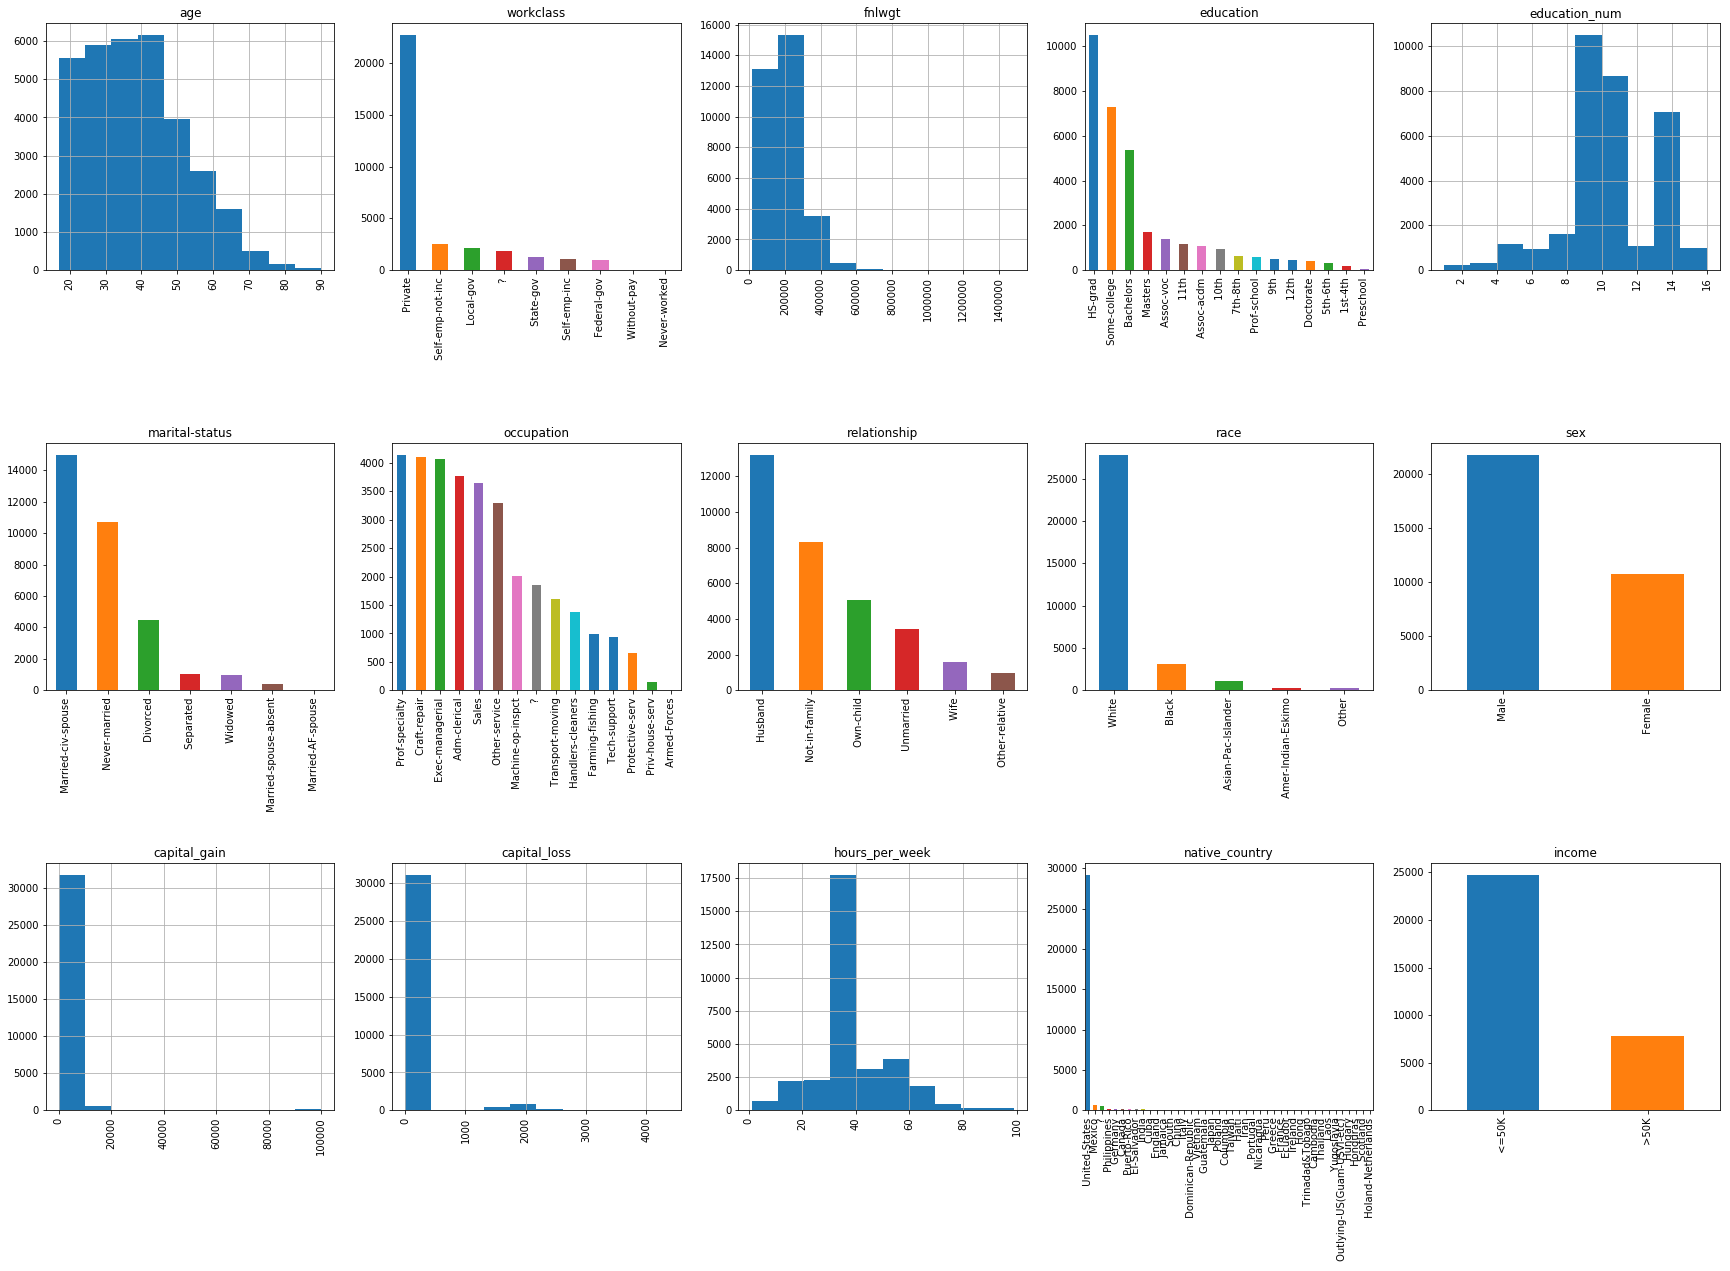

In [60]:
fig = plt.figure(figsize=(30,20))
cols = 5 # df.shape[1] should be divisible by # of
rows = float(df.shape[1]) / cols
for index, col_name in enumerate(df.columns):
    ax = fig.add_subplot(rows, cols, index + 1)
    ax.set_title(col_name)
    
    #makes count for columns which are not numeric
    if df.dtypes[col_name] == np.object:
        df[col_name].value_counts().plot(kind="bar", axes=ax)
    else:
        df[col_name].hist(axes=ax)
        plt.xticks(rotation="vertical")
plt.subplots_adjust(hspace=0.7, wspace=0.2)

In [61]:
#most of the data is coming from the US, therefore, makes sense to encode
df.loc[df['native_country'] != ' United-States','native_country'] = 'Non_Usa'

In [62]:
df.isna().any() #no missing values...

age               False
workclass         False
fnlwgt            False
education         False
education_num     False
marital-status    False
occupation        False
relationship      False
race              False
sex               False
capital_gain      False
capital_loss      False
hours_per_week    False
native_country    False
income            False
dtype: bool

# Produce the models

In [63]:
from sklearn.model_selection import train_test_split

In [155]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in df.columns:
    df[i]=le.fit_transform(df[i])

In [154]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital-status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


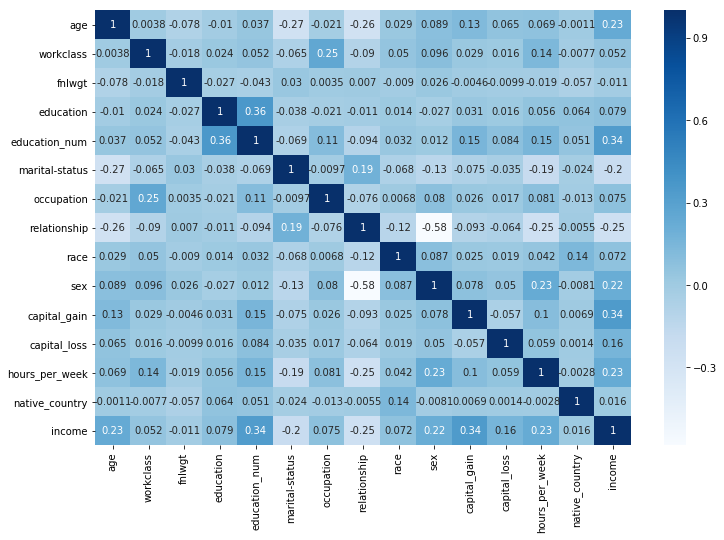

In [156]:
#Note: only numeric values will be displayed!
hmap = df.corr()
plt.subplots(figsize=(12, 8))
sns.heatmap(hmap, annot=True, cmap="Blues");

In [157]:
import random
import sklearn
random.seed(100)
train,test = train_test_split(df,test_size=0.2)

## Baseline model

In [158]:
l = pd.DataFrame(test['income']) #baseline says that all are zeros
l['baseline'] = 0
k = pd.DataFrame(sklearn.metrics.confusion_matrix(test['income'],l['baseline']))
print(k)
(k[0][0]+k[1][1])/(k[0][0]+k[1][1]+k[0][1]+k[1][0])

      0  1
0  4924  0
1  1589  0


0.75602640872101945

## Logistic regression

In [159]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
X_train = train.drop('income',axis=1)
Y_train = train['income']
clf.fit(X_train,Y_train)
X_test = test.drop('income',axis = 1)
Y_test = test['income']

In [160]:
clf.score(X_train,Y_train) #got 80% on train set

0.80773955773955775

# Step 3: Evaluate 

Text(0.5,442.811,'Predicted value')

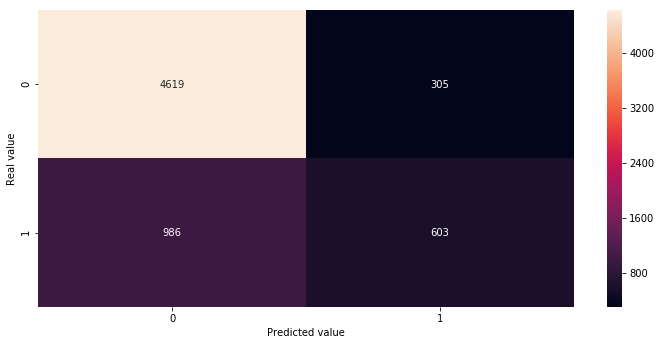

In [161]:
#Produce confusion matrix
y_pred = clf.predict(X_test)
cm = metrics.confusion_matrix(Y_test, y_pred)

plt.figure(figsize=(12,12))
plt.subplot(2,1,1)
sns.heatmap(cm, annot=True,fmt="d")
plt.ylabel("Real value")
plt.xlabel("Predicted value")

#print( "F1 score: %f" % metrics.f1_score(Y_test, y_pred)) weighted average of precision and recall

In [162]:
#Precision of the model, how accurate the model is
print((cm[0][0]+cm[1][1])/(cm[0][0]+cm[1][1]+cm[0][1]+cm[1][0]))
print(metrics.accuracy_score(y_pred,Y_test)) 

0.801781053278
0.801781053278


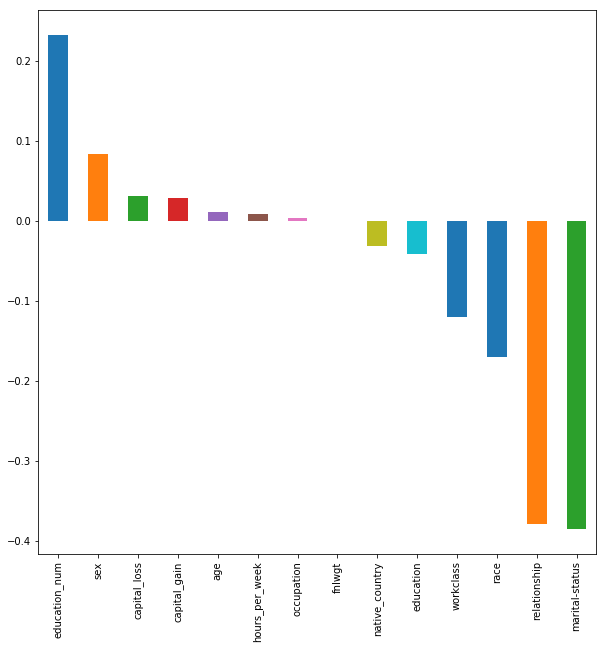

In [163]:
coefs = pd.Series(clf.coef_[0], index=X_train.columns)
coefs = coefs.sort_values(ascending=False)
plt.figure(figsize = (10,10))
coefs.plot(kind="bar")
plt.show()

In [130]:
clf.coef_

array([[  9.45881512e-03,  -1.46235985e-01,  -2.11133884e-05,
         -4.84909746e-02,   2.13620249e-01,  -4.06829433e-01,
          1.94423520e-03,  -4.31666650e-01,  -2.88007543e-01,
          5.23954765e-02,   2.83385178e-02,   3.05174018e-02,
          5.96487505e-03,  -4.10642928e-02]])

# Feature selection 

In [164]:
from sklearn.ensemble import ExtraTreesClassifier

In [165]:
df.shape

(32561, 15)

In [166]:
array = df.values

In [167]:
X = array[:,0:14]
Y = array[:,14]

In [168]:
model = ExtraTreesClassifier()
model.fit(X, Y)
print(model.feature_importances_)
print(df.columns)

#construct df to rate feature importance
names = df.drop(['income'],axis = 1)
df = pd.DataFrame({"values":model.feature_importances_,"names":names.columns.values})
df = df.sort_values(by = 'values', ascending=False)
df

[ 0.14427799  0.04362078  0.1552436   0.03378292  0.08319754  0.0788513
  0.07468075  0.08136038  0.01515028  0.02690724  0.11671345  0.03557737
  0.09345431  0.01718211]
Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')


,names,values
2,fnlwgt,0.155244
0,age,0.144278
10,capital_gain,0.116713
12,hours_per_week,0.093454
4,education_num,0.083198
7,relationship,0.081360
5,marital-status,0.078851
6,occupation,0.074681
1,workclass,0.043621
11,capital_loss,0.035577
